In [1]:
import numpy as np
import cv2
from skimage.segmentation import clear_border
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline
import matplotlib
from matplotlib import pyplot as plt
import os
import seaborn as sns
import sys
%matplotlib inline

In [2]:
# img = cv2.imread('C:\Users\Serena\Desktop\campione20mL.jpg',-1)
# img = cv2.imread('C:/Users/Giacomo/Documents/gitRepos/Serena/shared_nbks/IMG_0054.JPG',-1)
img = cv2.imread('C:\Users\LISA01\Documents\gitrepos\Untitled Folder\Febbraio.JPG',-1)

In [3]:
img_B,img_G,img_R = cv2.split(img)

In [4]:
img2 = cv2.merge((img_R,img_G,img_B))

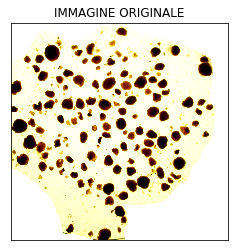

In [17]:
plt.imshow(img2), plt.grid('off'), plt.xticks([]), plt.yticks([]), plt.title('IMMAGINE ORIGINALE'); 
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Febbraio\OriginalRGB.jpg',dpi=500)

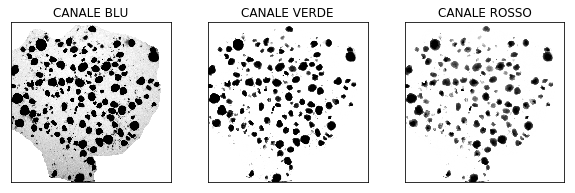

In [7]:
plt.figure(figsize=(10, 10))
plt.subplot(3,3,1),plt.imshow(img_B, cmap='gray'), plt.title('CANALE BLU'), plt.xticks([]), plt.yticks([]); 
plt.subplot(3,3,2), plt.imshow(img_G, cmap='gray'), plt.title('CANALE VERDE'), plt.xticks([]), plt.yticks([]); 
plt.subplot(3,3,3), plt.imshow(img_R, cmap='gray'), plt.title('CANALE ROSSO'), plt.xticks([]), plt.yticks([]); 
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Febbraio\channels.jpg',dpi=500)

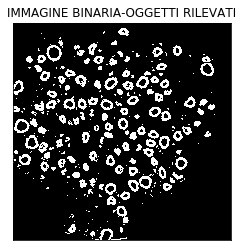

In [19]:
binImg = cv2.adaptiveThreshold(img_G, 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 125,9)
plt.imshow(binImg, cmap='Greys',  interpolation='nearest'), 
plt.title('IMMAGINE BINARIA-OGGETTI RILEVATI'), plt.xticks([]), plt.yticks([]);  
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Febbraio\oggetti_rilevati.jpg',dpi=500)

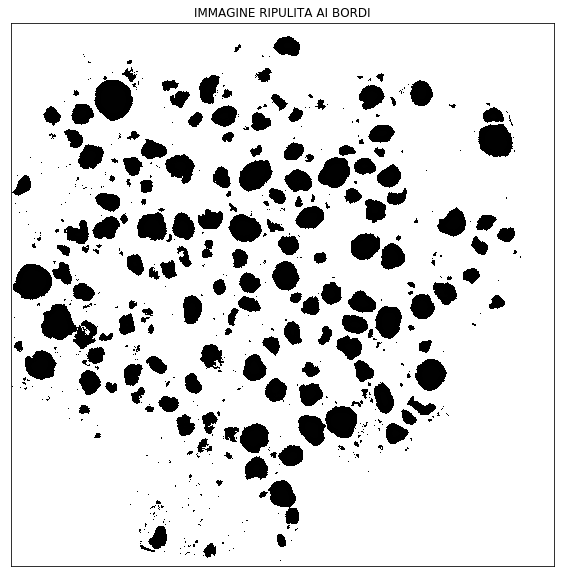

In [20]:
dst_inv = cv2.bitwise_not(binImg) 
img_clb = clear_border(dst_inv, buffer_size=5, bgval=1)
plt.figure(figsize=(10,10))
plt.imshow(img_clb, cmap='Greys',  interpolation='nearest'), plt.title('IMMAGINE RIPULITA AI BORDI'), 
plt.grid('off'), plt.xticks([]), plt.yticks([]);
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Febbraio\IMMAGINE RIPULITA AI BORDI.jpg', dpi=500)

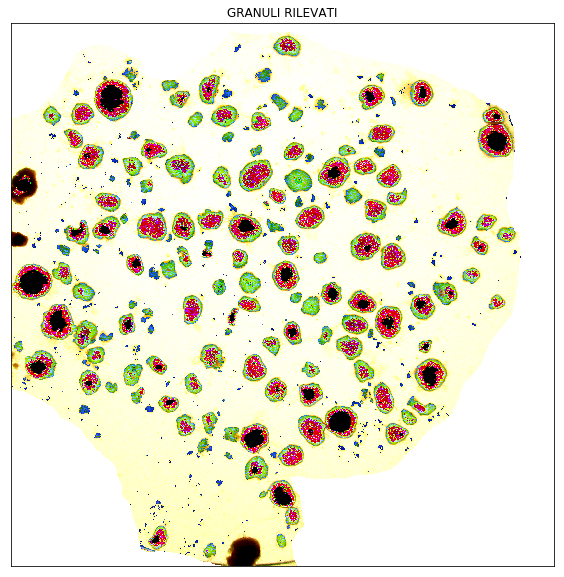

In [21]:
img_outl = cv2.merge((img_R * img_clb, img_G * img_clb, img_B * img_clb))
plt.figure(figsize=(10, 10));
plt.imshow(img_G * img_clb), plt.title('GRANULI RILEVATI'), plt.xticks([]), plt.yticks([])
plt.imshow(img_outl), plt.title('GRANULI RILEVATI'), plt.grid('off'), plt.xticks([]), plt.yticks([]);
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Febbraio\GRANULI_RILEVATI.jpg',dpi=500)

In [22]:
marker_image, props = bubble_properties_calculate(img_clb,rules={'convexity': {'min':1.9 }, 'circularity_reciprocal': {'max': 2.8, 'min': 0.2}});



{'max': 2.8, 'min': 0.2}
{'min': 1.9}


In [23]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
3,16239,"(156.9769690251863, 1778.4272430568385)",17216,143.791992,627.470129,25.880116,1.929376
31,761,"(257.87122207621553, 761.4467805519054)",885,31.127725,137.260931,5.544185,1.970150
34,146,"(261.24657534246575, 504.86301369863014)",209,13.634257,62.248737,2.345429,2.112022
72,1667,"(352.86142771445714, 2377.586082783443)",2004,46.070493,216.338095,7.705531,2.234192
82,17014,"(429.9854237686611, 1272.3070412601387)",19052,147.183211,763.109740,22.295614,2.723690


In [24]:
props['equivalent_diameter_mm']=props['equivalent_diameter']/49

props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal,equivalent_diameter_mm
label,,,,,,,,
3,16239,"(156.9769690251863, 1778.4272430568385)",17216,143.791992,627.470129,25.880116,1.929376,2.934530
31,761,"(257.87122207621553, 761.4467805519054)",885,31.127725,137.260931,5.544185,1.970150,0.635260
34,146,"(261.24657534246575, 504.86301369863014)",209,13.634257,62.248737,2.345429,2.112022,0.278250
72,1667,"(352.86142771445714, 2377.586082783443)",2004,46.070493,216.338095,7.705531,2.234192,0.940214
82,17014,"(429.9854237686611, 1272.3070412601387)",19052,147.183211,763.109740,22.295614,2.723690,3.003739


In [25]:
def classe(equivalent_diameter_mm):
    if equivalent_diameter_mm>= 5:
        return 12
    elif 4<=equivalent_diameter_mm<5:
        return 11
    elif 3.5<=equivalent_diameter_mm<4:
        return 10
    elif 3<=equivalent_diameter_mm<3.5:
        return 9
    elif 2.5<=equivalent_diameter_mm<3:
        return 8
    elif 2<=equivalent_diameter_mm<2.5:
        return 7
    elif 1.5<=equivalent_diameter_mm<2:
        return 6
    elif 1<=equivalent_diameter_mm<1.5:
        return 5
    elif 0.8<=equivalent_diameter_mm<1:
        return 4
    elif 0.5<=equivalent_diameter_mm<0.8:
        return 3
    elif 0.2<=equivalent_diameter_mm<0.5:
        return 2
    elif equivalent_diameter_mm<0.2:
        return 1
    

In [26]:
props["equivalent_diameter_mm"].apply(classe);


In [27]:
props['classe']=props["equivalent_diameter_mm"].apply(classe)
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal,equivalent_diameter_mm,classe
label,,,,,,,,,
3,16239,"(156.9769690251863, 1778.4272430568385)",17216,143.791992,627.470129,25.880116,1.929376,2.934530,8
31,761,"(257.87122207621553, 761.4467805519054)",885,31.127725,137.260931,5.544185,1.970150,0.635260,3
34,146,"(261.24657534246575, 504.86301369863014)",209,13.634257,62.248737,2.345429,2.112022,0.278250,2
72,1667,"(352.86142771445714, 2377.586082783443)",2004,46.070493,216.338095,7.705531,2.234192,0.940214,4
82,17014,"(429.9854237686611, 1272.3070412601387)",19052,147.183211,763.109740,22.295614,2.723690,3.003739,9


In [28]:
classi=props["equivalent_diameter_mm"].apply(classe)


In [29]:
[1 for i in classi if i==1]
print('classe 1')
len( [1 for i in classi if i==1])

classe 1


10

In [30]:
[2 for i in classi if i==2] 
print('classe 2')
len([2 for i in classi if i==2]  )

classe 2


78

In [31]:
[3 for i in classi if i==3] 
print('classe 3')
len([3 for i in classi if i==3] )

classe 3


26

In [32]:
[4 for i in classi if i==4]
print('classe 4')
len([4 for i in classi if i==4])

classe 4


5

In [33]:
[5 for i in classi if i==5]
print('classe 5')
len([5 for i in classi if i==5])


classe 5


13

In [34]:
[6 for i in classi if i==6]
print('classe 6')
len([6 for i in classi if i==6])

classe 6


15

In [35]:
[7 for i in classi if i==7]
print('classe 7')
len([7 for i in classi if i==7])

classe 7


30

In [36]:
[8 for i in classi if i==8]
print('classe 8')
len([8 for i in classi if i==8])

classe 8


23

In [37]:
[9 for i in classi if i==9]
print('classe 9')
len([9 for i in classi if i==9])

classe 9


18

In [38]:
[10 for i in classi if i==10]
print('classe 10')
len([10 for i in classi if i==10])

classe 10


10

In [39]:
[11 for i in classi if i==11]
print('classe 11')
len([11 for i in classi if i==11])

classe 11


5

In [40]:
[12 for i in classi if i==12]
print('classe 12')
len([12 for i in classi if i==12])

classe 12


1

In [41]:
len(classi)

234

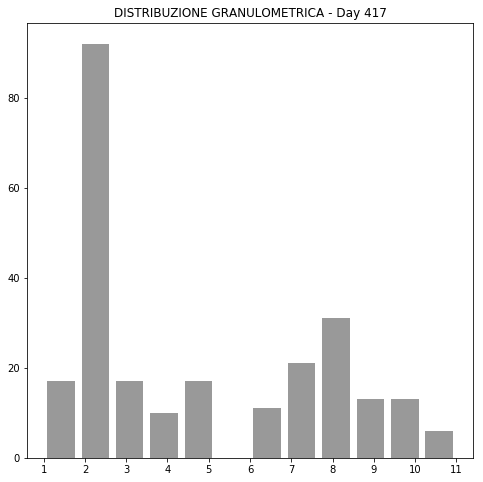

In [101]:
fig = plt.figure(figsize=(8,8));
plt.xticks([k for k in range(0,15)]);
classi.hist(bins=12, rwidth=0.8, color='GREY', align='mid', alpha=0.8); #rwidth =spessore barra #non riesco a mettere il numero al centro della barra

plt.grid('off'),plt.title('DISTRIBUZIONE GRANULOMETRICA - Day 417')
#plt.xlabel('Classi granulometriche')
#plt.ylabel('Frequenza')
plt.savefig('C:\Users\LISA01\Pictures\Granulometria_Unifi\Marzo\Marzo.PNG',dpi=500)

In [102]:
#fig = plt.figure(figsize=(10,10))
#sns.pairplot(props)#prendi solo l'immagine che ti interessa...l'ultima



In [103]:
#ax = plt.subplot(111) # crei un'area di plotting
#ax.set_xticks(range(10)) # l'asse x va da 0 a 10
#ax.set_yticks(range(10)) #l'asse y va da 0 a 10


In [104]:
rect = [props.centroid] 
rect


[label
 1       (18.055555555555557, 1654.8333333333333)
 19        (68.08154911838791, 970.5692695214105)
 21      (102.93083172974129, 1516.2298481932862)
 58         (111.419452887538, 866.7613981762918)
 75      (252.26940827994764, 2081.6400771509266)
 82       (259.0300741263678, 1039.7067419696434)
 86       (295.5744704612292, 2272.6278896623608)
 88       (291.1253279900768, 1453.7201946472019)
 105        (288.3330745341615, 760.945652173913)
 142      (296.95454545454544, 826.4090909090909)
 156      (321.51708766716195, 669.7934621099554)
 162               (344.98125, 2421.172554347826)
 188      (404.13573101832714, 720.7988149373019)
 196       (447.2037828327259, 855.8432826442126)
 226                            (397.69, 1588.84)
 235        (455.1298190401259, 540.486231313926)
 236      (445.5628259838786, 1962.7539118065433)
 238     (481.84122628195075, 1274.4038732946526)
 264     (457.01927710843376, 1120.0506024096385)
 284        (515.523598411379, 670.60127459

In [105]:
rect=[49.7609561753, 1916.57768924]
#plt.plot([1,2,3]);
#plt.axis([-1.1, 1.1, -1.1, 1.1]) ;
# plt.xticks([0.25*k for k in range(-4,5)]) ;
#plt.yticks([-0.9, -0.4, 0.0, 0.3, 0.6, 0.85],['A','B','C','D','E','F']);
#plt.title('The cubic function in [-1,1]')
#plt.xlabel('my x-axis label')
#plt.ylabel('my y-axis label')
#plt.grid()
#x=1,2,3
#y=3,2,4
#plt.plot(x,y,'g:o');

In [106]:
#x=185.968253968,407.153994845
#y=#.55026455,385.184439433
#plt.plot(x,y,'g:o');